![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

# Introduction to the Research Environment

The research environment is powered by IPython notebooks, which allow one to perform a great deal of data analysis and statistical validation. We'll demonstrate a few simple techniques here.

# Code Cells vs. Text Cells

As you can see, each cell can be either code or text. To select between them, choose from the 'Cell Type' dropdown menu on the top left.

# Executing a Command

A code cell will be evaluated when you press play, or when you press the shortcut, shift-enter. Evaluating a cell evaluates each line of code in sequence, and prints the results of the last line below the cell.

In [1]:
2 + 2

4

Sometimes there is no result to be printed, as is the case with assignment.

In [2]:
x = 2

Remember that only the result from the last line is printed.

In [3]:
2 + 2
3 + 3

6

However, you can print whichever lines you want using the print statement.

In [5]:
print(2 + 2)
3 + 3

4


6

# Knowing When a Cell is Running

While a cell is running, a [*] will display on the left. When a cell has yet to be executed, [ ] will display. When it has been run, a number will display indicating the order in which it was run during the execution of the notebook [5]. Try on this cell and note it happening.

In [7]:
#Take some time to run something
c = 0
for i in range(10000000):
    c += i
c

49999995000000

# Importing Libraries

The vast majority of the time, you'll want to use functions from pre-built libraries. You can't import every library on Quantopian due to security issues, but you can import most of the common scientific ones. Here I import numpy and pandas, the two most common and useful libraries in quant finance. I recommend copying this import statement to every new notebook.

Notice that you can rename libraries to whatever you want after importing. The as statement allows this. Here we use np and pd as aliases for numpy and pandas. This is a very common aliasing and will be found in most code snippets around the web. The point behind this is to allow you to type fewer characters when you are frequently accessing these libraries.

In [8]:
import numpy as np
import pandas as pd

# This is a plotting library for pretty pictures.
import matplotlib.pyplot as plt

# Tab Autocomplete

Unfortuantely, tab autocomplete is not available in the quantconnect platform. 


# Getting Documentation Help

Placing a question mark after a function and executing that line of code will give you the documentation IPython has for that function. It's often best to do this in a new cell, as you avoid re-executing other code and running into bugs.

In [10]:
np.random.normal?


# Sampling
We'll sample some random data using a function from numpy.

In [11]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.
X = np.random.normal(0, 1, 100)

# Plotting
We can use the plotting library we imported as follows.


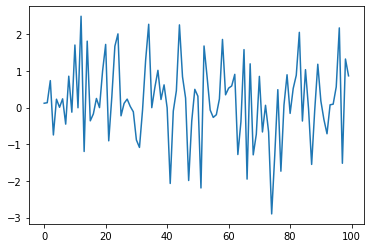

In [16]:
plt.plot(X)

# Line Output is Annoying

You might have noticed the annoying line of the form [<matplotlib.lines.Line2D at 0x7f003a8d5160>] before the plots. This is because the .plot function actually produces output. Sometimes we wish not to display output, we can accomplish this with the semi-colon as follows.

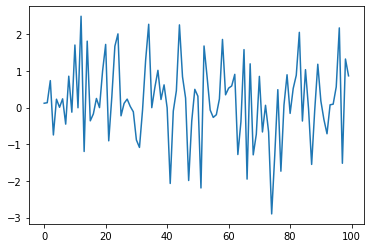

In [17]:
plt.plot(X);

# Adding Axis Labels
No self-respecting quant leaves a graph without labeled axes. Here are some commands to help with that.

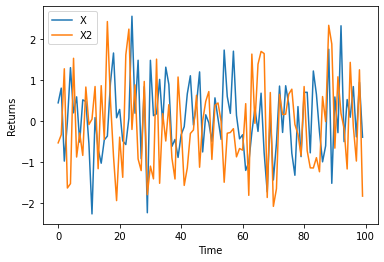

In [18]:
X = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

# Generating Statistics
Let's use numpy to take some simple statistics.

In [19]:
np.mean(X)

0.07844112149533546

In [20]:
np.std(X)

0.907643957406515

# Get Real Pricing Data

Randomly sampled data can be great for testing ideas, but let's get some real data. We can use .History to do that.

QuantBook is a wrapper on QCAlgorithm which allows you to access QCAlgorithm methods in the notebook environment. QuantBook gives you access to the vast amounts of data QuantConnect hosts. Similar to backtesting, you can access that data using history calls. You can also create indicators, consolidate data, and access charting features. However, keep in mind that event-driven features available in backtesting, like universe selection and OnData events, are not available in research.

In [21]:
# Using QuantBook to subscribe to msft data and then making a history call for daily resolution data.

qb = QuantBook()
msft = qb.AddEquity("MSFT") # add equity data

In [22]:
start_time = datetime(2012, 1, 1) # start datetime for history call
end_time = datetime(2015, 6, 1) # end datetime for history call

# Returns daily historical data between January 1st 2012 and June 1st 2015
history = qb.History(msft.Symbol, start_time, end_time, Resolution.Daily)

In [24]:
history.head()

close       high        low       open       volume
symbol  time                                                               
MSFT 2T 2012-01-04  21.798031  21.903649  21.440553  21.529922   77544274.0
        2012-01-05  22.261127  22.317999  21.757408  21.789906   97515406.0
        2012-01-06  22.488613  22.529236  22.171758  22.261127   66681410.0
        2012-01-07  22.837967  22.902963  22.366746  22.366746  118702757.0
        2012-01-10  22.537360  22.829842  22.521111  22.772971   71646111.0

# Accessing and Manipulating Data
The dataframe returned will have a column for each data type available. For equities, the dataframe will have a column for Open, High, Low, Close, and Volume data since equity quote data is not yet available. The rows are indexed by time, meaning each OHLC row correlates to one timestamp. The frequency between timestamps will depend on the resolution of data. Rows are also indexed by symbols if multiple symbols were passed into the history call.

We can use history.loc["MSFT"] to access the time series row data for a specific symbol. The row data will contain the open, high, low, close, and volume data for a given timestamp.

In [25]:
data = history.loc['MSFT']

Our data is now a dataframe. You can see the datetime index and the colums with different pricing data.

In [26]:
data

,close,high,low,open,volume
time,,,,,
2012-01-04,21.798031,21.903649,21.440553,21.529922,77544274.0
2012-01-05,22.261127,22.317999,21.757408,21.789906,97515406.0
2012-01-06,22.488613,22.529236,22.171758,22.261127,66681410.0
2012-01-07,22.837967,22.902963,22.366746,22.366746,118702757.0
2012-01-10,22.537360,22.829842,22.521111,22.772971,71646111.0
...,...,...,...,...,...
2015-05-23,42.038595,42.450913,41.966887,42.406096,28371034.0
2015-05-27,41.760728,42.020668,41.402189,41.975850,31711885.0
2015-05-28,42.675000,42.818415,41.787618,41.948960,27731989.0


This is a pandas dataframe, so we can index in to just get close price like this.

In [27]:
X = data['close']

Because there is now also date information in our data, we provide two series to .plot. X.index gives us the datetime index, and X.values gives us the pricing values. These are used as the X and Y coordinates to make a graph.

/opt/miniconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


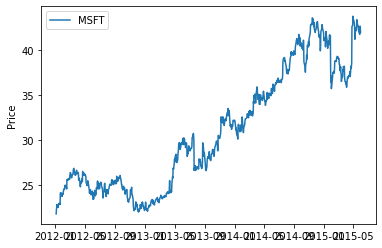

In [30]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['MSFT']);

We can get statistics again on real data.

In [31]:
np.mean(X)

30.90451799781665

In [32]:
np.std(X)

6.543879107458128

# Getting Returns from prices
We can use the pct_change function to get returns. Notice how we drop the first element after doing this, as it will be NaN (nothing -> something results in a NaN percent change).

In [33]:
R = X.pct_change()[1:]

In [38]:
R.shape

(855,)

We can plot the returns distribution as a histogram.

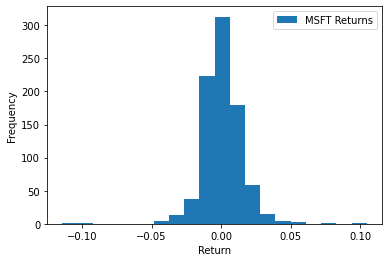

In [34]:
plt.hist(R, bins = 20)
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.legend(["MSFT Returns"]);

Get statistics again.

In [35]:
np.mean(R)

0.0008710696242400655

In [36]:
np.std(R)

0.014384676518412205

Now let's go backwards and generate data out of a normal distribution using the statistics we estimated from Microsoft's returns. We'll see that we have good reason to suspect Microsoft's returns may not be normal, as the resulting normal distribution looks far different.

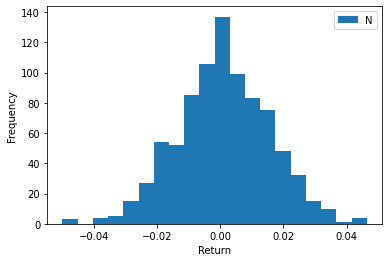

In [39]:
plt.hist(np.random.normal(np.mean(R),np.std(R), 855), bins = 20)
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.legend("Normally Distributed Returns")

# Generating a Moving Average
pandas has some nice tools to allow us to generate rolling statistics. Here's an example. Notice how there's no moving average for the first 60 days, as we don't have 60 days of data on which to generate the statistic.

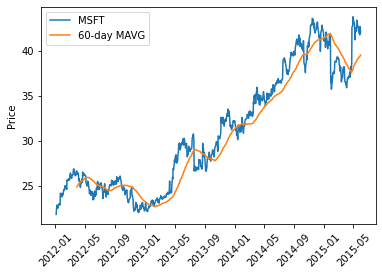

In [44]:
MAVG = data[['close']].rolling(window = 60).mean()
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(['MSFT', "60-day MAVG"]);